In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn import metrics # for calculating Silhouette score

from collections import Counter

import numpy as np


import plotly as py

import plotly.graph_objs as go

import warnings

warnings.filterwarnings('ignore')

from sklearn import preprocessing 

import scipy.cluster.hierarchy as sch

from sklearn.cluster import AgglomerativeClustering 

import kmodes

from kmodes.kprototypes import KPrototypes

In [2]:
# pip install kmodes

In [3]:
df = pd.read_excel('danish crown\data for cluster 11.28 no mindset.xlsx')

In [4]:
df

,Unnamed: 0,QUOTAGERANGE,AgexGender_Recode,MOMENT_LOOP_1_Q27,MOMENT_LOOP_1_Q30,MOMENT_LOOP_1_Q31,MOMENT_LOOP_1_Q26_1,MOMENT_LOOP_1_Q26_2,MOMENT_LOOP_1_Q26_4,MOMENT_LOOP_1_Q26_5,...,functional_component_6,functional_component_7,functional_component_8,functional_component_9,functional_component_10,MOMENT_LOOP_1_Q23_1,MOMENT_LOOP_1_Q23_4,MOMENT_LOOP_1_Q23_5,MOMENT_LOOP_1_Q25_1,weight_moment
0,0,3,8,4,1,3,0,1,0,0,...,0.08278,-0.62882,-0.81005,-1.18872,-0.69111,0,1,0,0,0.78
1,1,3,8,4,2,2,0,1,0,0,...,-2.90380,0.19288,-0.06323,-0.19183,-0.10633,0,0,1,0,0.56
2,2,3,8,3,1,4,0,0,0,0,...,-2.50825,-1.55455,-0.47111,-0.19735,1.19978,0,1,0,1,0.89
3,3,5,10,3,2,4,0,1,1,0,...,-1.11606,-0.27835,-0.32140,-0.14266,1.85445,0,1,0,0,4.23
4,4,5,10,3,2,4,0,1,0,0,...,-2.27563,-0.25235,-0.55006,-0.32955,1.02560,0,1,0,0,1.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,39156,3,3,4,1,1,0,1,0,0,...,0.90803,1.50973,0.32362,-1.13410,0.21187,1,0,0,0,1.98
39157,39157,3,3,4,1,2,0,1,0,0,...,0.67834,0.38214,0.05774,-0.19060,-1.05633,0,0,0,1,0.64
39158,39158,3,3,1,1,1,0,0,1,0,...,0.44832,0.62717,0.17384,0.18910,1.04672,1,0,0,0,2.55
39159,39159,3,8,1,2,4,1,0,0,0,...,0.42449,-0.29275,-0.60906,0.48566,-0.32149,0,1,0,1,5.11


In [5]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [6]:
df

,QUOTAGERANGE,AgexGender_Recode,MOMENT_LOOP_1_Q27,MOMENT_LOOP_1_Q30,MOMENT_LOOP_1_Q31,MOMENT_LOOP_1_Q26_1,MOMENT_LOOP_1_Q26_2,MOMENT_LOOP_1_Q26_4,MOMENT_LOOP_1_Q26_5,MOMENT_LOOP_1_Q26_7,...,functional_component_6,functional_component_7,functional_component_8,functional_component_9,functional_component_10,MOMENT_LOOP_1_Q23_1,MOMENT_LOOP_1_Q23_4,MOMENT_LOOP_1_Q23_5,MOMENT_LOOP_1_Q25_1,weight_moment
0,3,8,4,1,3,0,1,0,0,1,...,0.08278,-0.62882,-0.81005,-1.18872,-0.69111,0,1,0,0,0.78
1,3,8,4,2,2,0,1,0,0,1,...,-2.90380,0.19288,-0.06323,-0.19183,-0.10633,0,0,1,0,0.56
2,3,8,3,1,4,0,0,0,0,1,...,-2.50825,-1.55455,-0.47111,-0.19735,1.19978,0,1,0,1,0.89
3,5,10,3,2,4,0,1,1,0,1,...,-1.11606,-0.27835,-0.32140,-0.14266,1.85445,0,1,0,0,4.23
4,5,10,3,2,4,0,1,0,0,1,...,-2.27563,-0.25235,-0.55006,-0.32955,1.02560,0,1,0,0,1.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,3,3,4,1,1,0,1,0,0,0,...,0.90803,1.50973,0.32362,-1.13410,0.21187,1,0,0,0,1.98
39157,3,3,4,1,2,0,1,0,0,0,...,0.67834,0.38214,0.05774,-0.19060,-1.05633,0,0,0,1,0.64
39158,3,3,1,1,1,0,0,1,0,0,...,0.44832,0.62717,0.17384,0.18910,1.04672,1,0,0,0,2.55
39159,3,8,1,2,4,1,0,0,0,0,...,0.42449,-0.29275,-0.60906,0.48566,-0.32149,0,1,0,1,5.11


In [7]:
df.columns

Index(['QUOTAGERANGE', 'AgexGender_Recode', 'MOMENT_LOOP_1_Q27',
       'MOMENT_LOOP_1_Q30', 'MOMENT_LOOP_1_Q31', 'MOMENT_LOOP_1_Q26_1',
       'MOMENT_LOOP_1_Q26_2', 'MOMENT_LOOP_1_Q26_4', 'MOMENT_LOOP_1_Q26_5',
       'MOMENT_LOOP_1_Q26_7', 'emo_compoent_1', 'emo_compoent_2',
       'emo_compoent_3', 'emo_compoent_4', 'emo_compoent_5', 'emo_compoent_6',
       'emo_compoent_7', 'emo_compoent_8', 'emo_compoent_9', 'emo_compoent_10',
       'emo_compoent_11', 'functional_component_1', 'functional_component_2',
       'functional_component_3', 'functional_component_4',
       'functional_component_5', 'functional_component_6',
       'functional_component_7', 'functional_component_8',
       'functional_component_9', 'functional_component_10',
       'MOMENT_LOOP_1_Q23_1', 'MOMENT_LOOP_1_Q23_4', 'MOMENT_LOOP_1_Q23_5',
       'MOMENT_LOOP_1_Q25_1', 'weight_moment'],
      dtype='object')

In [8]:
df.dtypes

QUOTAGERANGE                 int64
AgexGender_Recode            int64
MOMENT_LOOP_1_Q27            int64
MOMENT_LOOP_1_Q30            int64
MOMENT_LOOP_1_Q31            int64
MOMENT_LOOP_1_Q26_1          int64
MOMENT_LOOP_1_Q26_2          int64
MOMENT_LOOP_1_Q26_4          int64
MOMENT_LOOP_1_Q26_5          int64
MOMENT_LOOP_1_Q26_7          int64
emo_compoent_1             float64
emo_compoent_2             float64
emo_compoent_3             float64
emo_compoent_4             float64
emo_compoent_5             float64
emo_compoent_6             float64
emo_compoent_7             float64
emo_compoent_8             float64
emo_compoent_9             float64
emo_compoent_10            float64
emo_compoent_11            float64
functional_component_1     float64
functional_component_2     float64
functional_component_3     float64
functional_component_4     float64
functional_component_5     float64
functional_component_6     float64
functional_component_7     float64
functional_component

<AxesSubplot:xlabel='QUOTAGERANGE', ylabel='Count'>

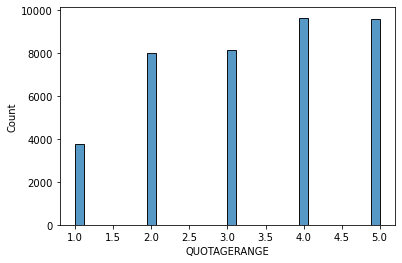

In [9]:
sns.histplot(df.QUOTAGERANGE)

In [11]:
df_non_weighted = df.drop(['weight_moment'], axis = 1).copy()

In [12]:
df_non_weighted

,QUOTAGERANGE,AgexGender_Recode,MOMENT_LOOP_1_Q27,MOMENT_LOOP_1_Q30,MOMENT_LOOP_1_Q31,MOMENT_LOOP_1_Q26_1,MOMENT_LOOP_1_Q26_2,MOMENT_LOOP_1_Q26_4,MOMENT_LOOP_1_Q26_5,MOMENT_LOOP_1_Q26_7,...,functional_component_5,functional_component_6,functional_component_7,functional_component_8,functional_component_9,functional_component_10,MOMENT_LOOP_1_Q23_1,MOMENT_LOOP_1_Q23_4,MOMENT_LOOP_1_Q23_5,MOMENT_LOOP_1_Q25_1
0,3,8,4,1,3,0,1,0,0,1,...,-0.94567,0.08278,-0.62882,-0.81005,-1.18872,-0.69111,0,1,0,0
1,3,8,4,2,2,0,1,0,0,1,...,-0.28370,-2.90380,0.19288,-0.06323,-0.19183,-0.10633,0,0,1,0
2,3,8,3,1,4,0,0,0,0,1,...,-0.27397,-2.50825,-1.55455,-0.47111,-0.19735,1.19978,0,1,0,1
3,5,10,3,2,4,0,1,1,0,1,...,0.28219,-1.11606,-0.27835,-0.32140,-0.14266,1.85445,0,1,0,0
4,5,10,3,2,4,0,1,0,0,1,...,-0.67980,-2.27563,-0.25235,-0.55006,-0.32955,1.02560,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,3,3,4,1,1,0,1,0,0,0,...,-0.22825,0.90803,1.50973,0.32362,-1.13410,0.21187,1,0,0,0
39157,3,3,4,1,2,0,1,0,0,0,...,1.12087,0.67834,0.38214,0.05774,-0.19060,-1.05633,0,0,0,1
39158,3,3,1,1,1,0,0,1,0,0,...,-0.87606,0.44832,0.62717,0.17384,0.18910,1.04672,1,0,0,0
39159,3,8,1,2,4,1,0,0,0,0,...,0.11039,0.42449,-0.29275,-0.60906,0.48566,-0.32149,0,1,0,1


In [13]:
df_non_weighted.dtypes

QUOTAGERANGE                 int64
AgexGender_Recode            int64
MOMENT_LOOP_1_Q27            int64
MOMENT_LOOP_1_Q30            int64
MOMENT_LOOP_1_Q31            int64
MOMENT_LOOP_1_Q26_1          int64
MOMENT_LOOP_1_Q26_2          int64
MOMENT_LOOP_1_Q26_4          int64
MOMENT_LOOP_1_Q26_5          int64
MOMENT_LOOP_1_Q26_7          int64
emo_compoent_1             float64
emo_compoent_2             float64
emo_compoent_3             float64
emo_compoent_4             float64
emo_compoent_5             float64
emo_compoent_6             float64
emo_compoent_7             float64
emo_compoent_8             float64
emo_compoent_9             float64
emo_compoent_10            float64
emo_compoent_11            float64
functional_component_1     float64
functional_component_2     float64
functional_component_3     float64
functional_component_4     float64
functional_component_5     float64
functional_component_6     float64
functional_component_7     float64
functional_component

In [14]:
categorical_index = [0,1,2,3,4]

In [15]:
df_non_weighted_scaled = scaler.fit_transform(df_non_weighted)

In [16]:
df_non_weighted_scaled

array([[-0.26042302,  0.75700429,  1.37035738, ...,  0.89540401,
        -0.20163821, -1.36409828],
       [-0.26042302,  0.75700429,  1.37035738, ..., -1.1168143 ,
         4.95937746, -1.36409828],
       [-0.26042302,  0.75700429,  0.528415  , ...,  0.89540401,
        -0.20163821,  0.73308501],
       ...,
       [-0.26042302, -1.01521917, -1.15546976, ..., -1.1168143 ,
        -0.20163821, -1.36409828],
       [-0.26042302,  0.75700429, -1.15546976, ...,  0.89540401,
        -0.20163821,  0.73308501],
       [-1.7949439 ,  0.04811491,  0.528415  , ..., -1.1168143 ,
        -0.20163821, -1.36409828]])

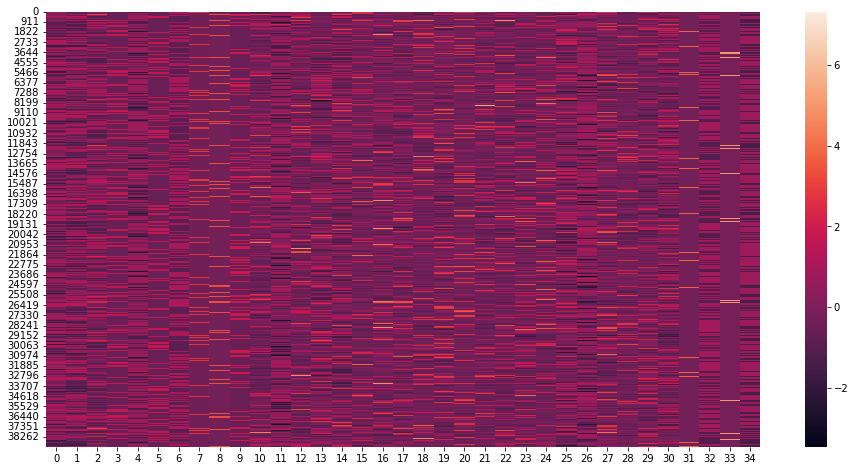

In [17]:
plt.figure(1, figsize = (16 ,8))
sns.heatmap(df_non_weighted_scaled)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

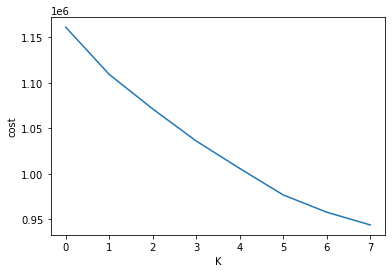

In [20]:
#Choosing optimal K value
cost = []
X = df_non_weighted_scaled
for num_clusters in list(range(2,10)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Huang', random_state=50, n_init=50) 
    kproto.fit_predict(X, categorical=categorical_index)
    cost.append(kproto.cost_)

plt.plot(cost)
plt.xlabel('K')
plt.ylabel('cost')
plt.show

In [20]:
X = df_non_weighted_scaled

In [21]:
kproto = KPrototypes(n_clusters=6, init='Huang', verbose=0, random_state=50,max_iter=20, n_init=50,n_jobs=-2,gamma=0.15) 
clusters_6 = kproto.fit_predict(X, categorical=categorical_index)

In [22]:
df['Cluster_6']=clusters_6

In [23]:
kproto = KPrototypes(n_clusters=5, init='Huang', verbose=0, random_state=50,max_iter=20, n_init=50,n_jobs=-2,gamma=0.15) 
clusters_5 = kproto.fit_predict(X, categorical=categorical_index)

In [24]:
df['Cluster_5']=clusters_5

In [25]:
kproto = KPrototypes(n_clusters=7, init='Huang', verbose=0, random_state=50,max_iter=20, n_init=50,n_jobs=-2,gamma=0.15) 
clusters_7 = kproto.fit_predict(X, categorical=categorical_index)

In [26]:
df['Cluster_7']=clusters_7

In [27]:
df

,QUOTAGERANGE,AgexGender_Recode,MOMENT_LOOP_1_Q27,MOMENT_LOOP_1_Q30,MOMENT_LOOP_1_Q31,MOMENT_LOOP_1_Q26_1,MOMENT_LOOP_1_Q26_2,MOMENT_LOOP_1_Q26_4,MOMENT_LOOP_1_Q26_5,MOMENT_LOOP_1_Q26_7,...,functional_component_9,functional_component_10,MOMENT_LOOP_1_Q23_1,MOMENT_LOOP_1_Q23_4,MOMENT_LOOP_1_Q23_5,MOMENT_LOOP_1_Q25_1,weight_moment,Cluster_6,Cluster_5,Cluster_7
0,3,8,4,1,3,0,1,0,0,1,...,-1.18872,-0.69111,0,1,0,0,0.78,2,2,6
1,3,8,4,2,2,0,1,0,0,1,...,-0.19183,-0.10633,0,0,1,0,0.56,3,0,2
2,3,8,3,1,4,0,0,0,0,1,...,-0.19735,1.19978,0,1,0,1,0.89,2,2,6
3,5,10,3,2,4,0,1,1,0,1,...,-0.14266,1.85445,0,1,0,0,4.23,1,2,4
4,5,10,3,2,4,0,1,0,0,1,...,-0.32955,1.02560,0,1,0,0,1.78,2,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,3,3,4,1,1,0,1,0,0,0,...,-1.13410,0.21187,1,0,0,0,1.98,0,3,3
39157,3,3,4,1,2,0,1,0,0,0,...,-0.19060,-1.05633,0,0,0,1,0.64,4,1,5
39158,3,3,1,1,1,0,0,1,0,0,...,0.18910,1.04672,1,0,0,0,2.55,0,3,3
39159,3,8,1,2,4,1,0,0,0,0,...,0.48566,-0.32149,0,1,0,1,5.11,5,4,1


In [30]:
df['Cluster_7'].value_counts()

5    12441
1     8811
6     7066
4     3768
0     2881
3     2664
2     1530
Name: Cluster_7, dtype: int64

In [27]:
df['Cluster_id'].value_counts()

2    15018
5     8723
4     7129
1     4092
0     2669
3     1530
Name: Cluster_id, dtype: int64

In [31]:
df.to_excel('KPrototypes 01.01.xlsx')